<a href="https://colab.research.google.com/github/prakhar281005/Python-Projects/blob/master/problem_set_4_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Molecular potential optimization using gradient descent

As we discussed in lecture, there are several physical systems that naturally minimize their potential energy. This can be framed as an optimization problem.

Two atoms or molecules exert a force on each other that can be attractive or repulsive, depending on the distance. There are several formal models that describe the potential energy of a system of two molecules. Let's look into the Lennard-Jones potential.

[Lennard-Jones potential - Wikipedia](https://en.wikipedia.org/wiki/Lennard-Jones_potential)

[Lennard-Jones potential - Chemistry LibreTexts](https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Physical_Properties_of_Matter/Atomic_and_Molecular_Properties/Intermolecular_Forces/Specific_Interactions/Lennard-Jones_Potential)

The first molecule is situated at the origin ($r=0$) and the second molecule is a distance $r=r$ from the first molecule. In the potential equation, the component to the power of 12 represents repulsive force potential and the negative component to the power of 6 represents attractive force potential.

$$V(r) = 4\epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^{6} \right]$$

* $V$ is the intermolecular potential between the two atoms or molecules.
* $r$ is the distance between the two atoms or molecules.
* $\epsilon$ is the potential well depth and a measure of how strongly the two particles attract each other.
* $\sigma$ is the distance at which the intermolecular potential between the two particles is zero.

Given the following units & parameters, write a function the takes in a value of $r$ and returns $V(r)$. Then, plot $V(r)$ using 500 points linearly spaced between 3 and 6 [Angstroms](https://en.wikipedia.org/wiki/Angstrom) ($r \in [3,6]$). Use a `figsize=(6,6)`, label your axes with proper units, and include a grid. Verify the correctness of your function implementation by checking the shape of your function is similar to plots of the Lennard-Jones potential on the Internet.

* $V$ is in units of kJ/mol
* $r$ is in units of Angstroms
* $\epsilon = 0.997$ kJ/mol
* $\sigma = 3.20$ Angstroms 

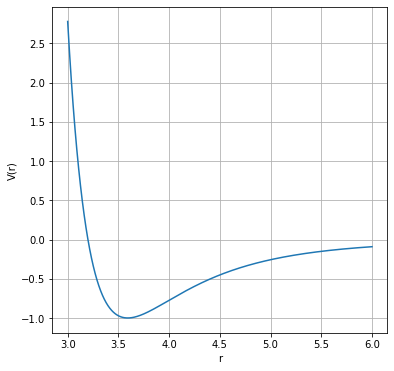

In [ ]:
### CODE HERE
from matplotlib import pyplot as plt
import numpy as np

well_depth = 0.997
zero_distance = 3.20
def V(r):
  V = 4* well_depth*((zero_distance/r)**12 - (zero_distance/r)**6)
  return V

r_plot = np.linspace(3,6,500)

plt.figure(figsize = [6,6])
plt.plot(r_plot,V(r_plot))
plt.xlabel("r")
plt.ylabel("V(r)")
plt.grid()

Now, the gradient (deriative) of the potential function is given by:
$$ \frac{dV}{dr} = 4\epsilon \left[ -\frac{12}{r} \left(\frac{\sigma}{r}\right)^{12} + \frac{6}{r} \left(\frac{\sigma}{r}\right)^{6} \right] $$
Write a function that takes in a value of $r$ and returns $\frac{dV}{dr}(r)$. Make a new plot with similar elements as before and plot both the potential function and its gradient and display a legend with labels for each.

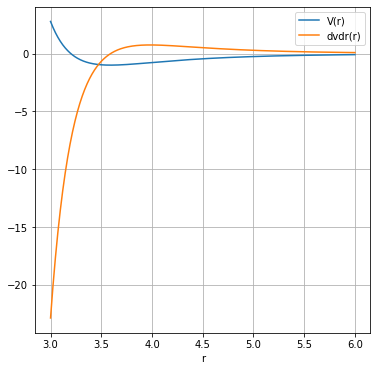

In [ ]:
### CODE HERE
def dvdr(r):
  dvdr = 4*well_depth*(-12/r *(zero_distance/r)**12 + 6/r * (zero_distance/r)**6)
  return dvdr

r_plot = np.linspace(3,6,500)

plt.figure(figsize = [6,6])
plt.plot(r_plot,V(r_plot), label = "V(r)")
plt.plot(r_plot, dvdr(r_plot), label = "dvdr(r)")
plt.xlabel("r")
plt.legend()
plt.grid()


Implement gradient descent with your choice of convergence criteria (you should use a `while` loop with one or several of the conditions described below):
* maximum number of iterations $k \ge k_{max}$, 
* absolute error convergence $|x_{k+1} - x_{k}| < tol$, 
* relative error convergence $\frac{|x_{k+1} - x_{k}|}{|x_{k}|} < tol$, 
* gradient convergence $|g_{k}| < tol$,

where $k$ is the iteration index and where $tol$ is a small number (tolerance), maybe on the order of 1E-2, 1E-4, or 1E-6 that you need to choose until you are happy with how your gradient descent converges. You can try different values of $tol$ and see how many iterations it takes before your gradient descent algorithm converges and also see the precision of the minimum (the $V$ value or the $r$ value, or both) that your algorithm finds.

Make sure to think about if your gradient descent diverges -- are you implementing any checks to make sure your loop doesn't run forever?

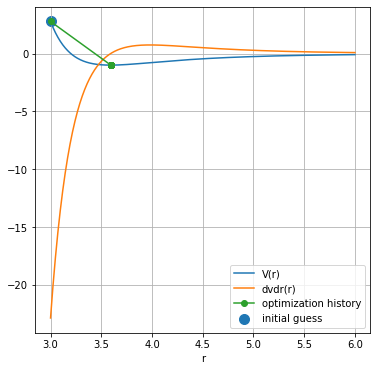

In [ ]:
### CODE HERE
def gradient_descent(x,g, alpha, k_max, tol):
  
  history = []
  history.append(x)
  k = 0
  xk1 = 5
  while k < k_max and np.linalg.norm(g(xk1))>= tol :
#and abs(history[k+1] - history[k]) >tol and abs(history[k+1] - history[k])/ abs(history[k] > tol)

    xk = history[-1]
    xk1 = xk - alpha * g(xk)
    history.append(xk1)
    k +=1
  return np.array(history)
  
def plotting():
  r_plot = np.linspace(3,6,500)

  plt.figure(figsize = [6,6])
  plt.plot(r_plot,V(r_plot), label = "V(r)")
  plt.plot(r_plot, dvdr(r_plot), label = "dvdr(r)")
  plt.xlabel("r")
  plt.legend()
  plt.grid()

plotting()
r0 = 3
alpha = 0.026
max_itter = 500
r_hist = gradient_descent(r0,dvdr,alpha,max_itter,1E-6)
plt.scatter(r0,V(r0), label = "initial guess", s = 100)
plt.plot(r_hist,V(r_hist), label = "optimization history", marker = "o")
plt.legend()




Now, use an initial guess of $r_0 = 3.0$ and run your gradient descent (GD) algorithm.

Tune the learning rate (LR) as necessary to get your algorithm to converge to the minimum. 

Show a similar plot of the optimization history overlaid on the function plot like the one first one we did in class (you can remove the gradient function from your plot if it looks better this way). 

Show a plot of the $r$ value as a function of the number of iterations of gradient descent like the last plot we made in class. 

Finally, list what convergence criteria you used (number of iterations, change between successive x values, etc.) and report the numerical value of $r$ and $V(r)$ that you find along with your learning rate $\alpha$.

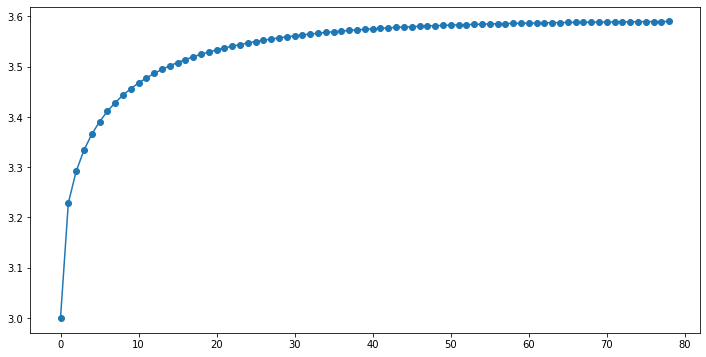

In [ ]:
### CODE HERE

def plot_history(r_hist):

  k = np.shape(r_hist)[0]
  plt.figure(figsize = (12,6))

  plt.scatter(range(k), r_hist)
  plt.plot(range(k),r_hist)

r_hist = gradient_descent(r0,dvdr,0.01,100,1E-2)
plot_history(r_hist)

Now, use an initial guess of $r_0 = 6.0$ and repeat the each of steps described in the cell above. (run GD, tune LR, plot optimization, plot $r$ over iterations, give convergence criteria, and list the optimal $r$, $V(r)$, and $\alpha$).

Optimal r: 3.5933747081743714
Optimal V(r): -0.9969937907248105


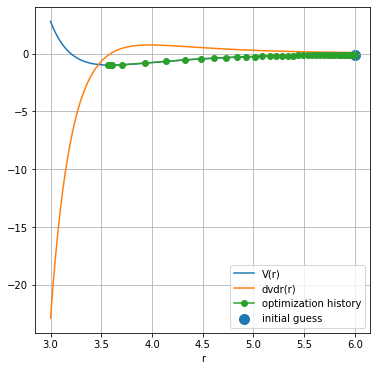

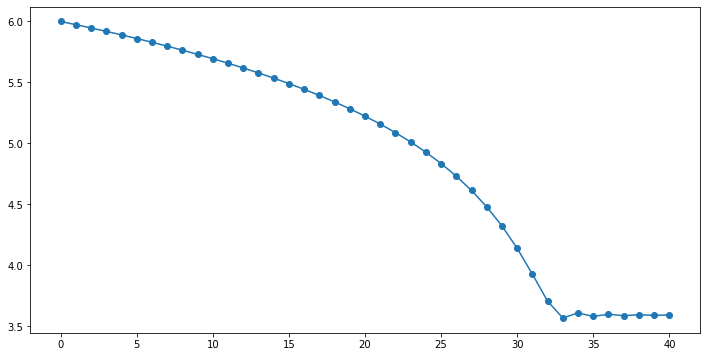

In [ ]:
### CODE HERE
plotting()
r0 = 6
alpha = 0.3
max_itter = 500
r_hist = gradient_descent(r0,dvdr,alpha,max_itter,1E-2)
plt.scatter(r0,V(r0), label = "initial guess", s = 100)
plt.plot(r_hist,V(r_hist), label = "optimization history", marker = "o")

plt.legend()
r_hist = gradient_descent(r0,dvdr,alpha,100,1E-2)
plot_history(r_hist)

print(f"Optimal r: {r_hist[-1]}")
print(f"Optimal V(r): {V(r_hist[-1])}")

In [ ]:
print(r_hist)
print(V(r_hist))

[6.         5.97198226 5.94307113 5.91320492 5.88231529 5.85032626
 5.81715299 5.78270043 5.74686154 5.70951525 5.6705239  5.6297301
 5.58695276 5.54198221 5.49457387 5.4444402  5.39124021 5.3345656
 5.27392233 5.20870553 5.13816501 5.06135697 4.97707527 4.88375248
 4.77931611 4.66098249 4.52497984 4.36626985 4.1787384  3.95825527
 3.71974494 3.56178227 3.62032351 3.57369959 3.60783913 3.58071366
 3.60125325 3.58501237 3.59748556 3.5876646  3.59526048 3.58929827
 3.59392719 3.59030143]
[-0.08966766 -0.09215965 -0.09481458 -0.09764951 -0.10068401 -0.10394062
 -0.10744542 -0.11122882 -0.11532643 -0.11978025 -0.12464017 -0.12996593
 -0.13582964 -0.14231915 -0.1495426  -0.15763457 -0.16676465 -0.17714942
 -0.18906978 -0.20289623 -0.21912684 -0.23844559 -0.26181435 -0.29062188
 -0.32693098 -0.37389395 -0.43643718 -0.52223474 -0.64205101 -0.80253107
 -0.96126648 -0.99432669 -0.99486959 -0.99604731 -0.99631294 -0.99664556
 -0.99675992 -0.99686707 -0.99691349 -0.99695019 -0.99696839 -0.9969813

Finally, using the code below, repeat gradient descent `n_inits` number of times with random initializations of $r_0 \in [3,6]$. You can change `n_inits` while you work on the solutions, but make sure it is at least ~50 or 100 when you generate your final plots. You should use the same learning rate for all of the runs of gradient descent, but you are free to tune the learning rate. 

You might consider making storage vectors or arrays to store:
* the solutions ($r$ or $V$ values) you get from each run of gradient descent,
* or, the number of iterations to convergence for each run, 
* or, the entire convergence history for each run. 

In [ ]:
import numpy as np

# set the random seed for repeatable randomness
np.random.seed(1)

### MAKE STORAGE VECTORS HERE FOR SOLUTIONS VALUES, 
history_of_r = []
history_of_vr = []
num_of_itt = []
initial_r = []

### NUMBER OF ITERATIONS TO CONVERGENCE, STORING ALL HISTORIES, ETC.

max_itter = 500
alpha = 0.28


n_inits = 100 # edit as necessary while debugging

for _ in range(n_inits):

  # generate random number between 3 and 6
  r0 = 3*np.random.random() + 3   

  ### DO ENTIRE GRADIENT DESCENT STARTING FROM X0

  r_hist = gradient_descent(r0,dvdr,alpha,max_itter,1E-2)
  
  ### APPEND OR UPDATE STORAGE VECTORS/ARRAYS AS NECESSARY  
  initial_r.append(r0)
  history_of_r.append(r_hist)
  history_of_vr.append(V(r_hist))
  num_of_itt.append(len(r_hist))


Now, using the gradient descent run data from above, make plots that explore the robustness of your gradient descent algorithm. You can make line plots, scatterplots, or histograms as necessary as you see fit. One example of a plot you could make is to plot the trajectories for every single run on a single graph. Another example would be to make a histogram of the number of iterations to convergence.

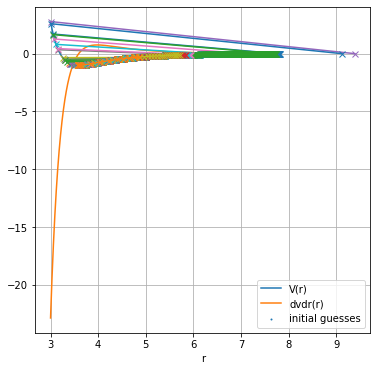

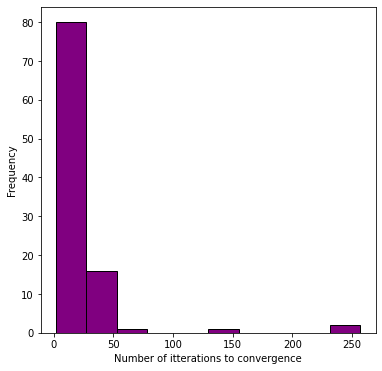

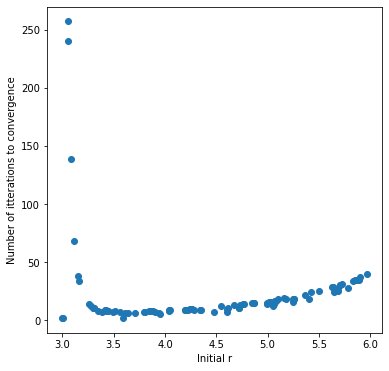

In [ ]:
### CODE HERE
from matplotlib import pyplot as plt

# plotting trajectories for every single run on a single graph

plotting()
plt.scatter(initial_r,V(np.array(initial_r)), label = "initial guesses", s = 1)

for i in range(len(history_of_r)):
  plt.plot(history_of_r[i],history_of_vr[i], marker = "x")
plt.legend()

#plotting a histogram of the number of iterations to convergence

plt.figure(figsize = (6,6))
plt.hist(num_of_itt, color = "purple", edgecolor = "black")
plt.xlabel("Number of itterations to convergence")
plt.ylabel("Frequency")
plt.show()

#plotting a scatter plot for the number of iterations taken to coverge with respect to initial position 

plt.figure(figsize = (6,6))
plt.scatter(initial_r,num_of_itt)
plt.xlabel("Initial r")
plt.ylabel("Number of itterations to convergence")
plt.show()

# 2) Gradient descent on a multimodal function

Not all functions like a quadratic or a molecular potential function have a single minimum. While our gradient descent algorithm will find only minima, we have no guarantee whether they are global or local minima, and we really want the global minimum. 

The Gramacy-Lee function is a 1D function that's an example of a multimodal function (it has a long-term parabolic/quartic shape, it has a peak near the origin, and it has a general sinusoidal behavior).

$$ f(x) = \frac{sin(10\pi x)}{2x} + (x-1)^4 $$

The minimum of the function is $f(x^*) \approx -2.84962$, which is just to the right of the origin, but there are many local minima throughout the function.

![Gramacy-Lee function](https://raw.githubusercontent.com/rbalexan/BenchmarkFunctions.jl/2923d3cd6269015847a3a360385b11ebd6554d3a/plots/1d_gramacy_lee.svg)

First, re-generate the plot of the function over the range $x\in[-0.5,2.5]$.

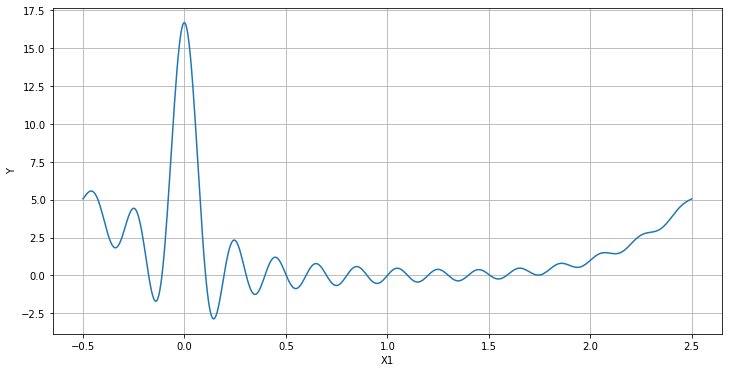

In [ ]:
### CODE HERE
import numpy as np
from matplotlib import pyplot as plt

def func(x):
  f = ((np.sin(10*np.pi*x))/ (2 * x)) + (x-1)**4
  return f

plot_x = np.linspace(-0.5,2.5,500)
def initial_plot():
  
  plt.figure(figsize = (12,6))
  plt.plot(plot_x,func(plot_x))
  plt.grid()
  plt.xlabel("X1")
  plt.ylabel("Y")
  plt.show()

initial_plot()

Create your function for the gradient. You can get the gradient from Wolfram-Alpha, which is a computational engine that has the rules for analytical differentiation programmed in. Go here to see the gradient:
https://www.wolframalpha.com/input/?i=d%2Fdx%28+sin%2810+pi+x%29%2F%282x%29+%2B+%28x-1%29%5E4+%29

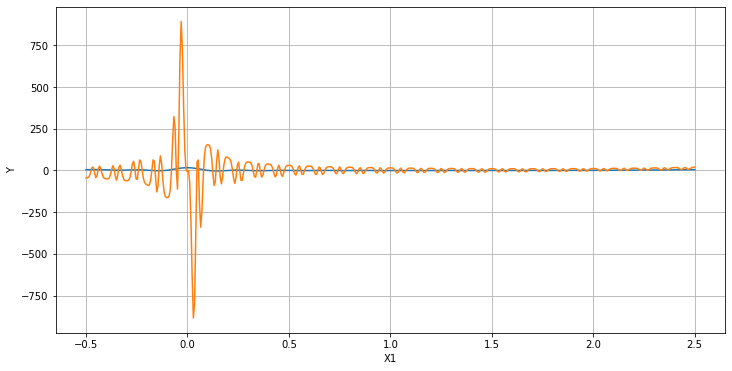

In [ ]:
### CODE HERE
def dydx(x):
  dydx = (-(np.sin(10*np.pi*x))/ (2 * (x**2))) + (4* (x-1)**3) + ((5* np.pi * np.cos(2 * np.pi * np.cos(10*pi*x))) / x)
  return dydx

plot_x = np.linspace(-0.5,2.5,500)
plt.figure(figsize = (12,6))
plt.plot(plot_x,func(plot_x))
plt.plot(plot_x,dydx(plot_x))
plt.grid()
plt.xlabel("X1")
plt.ylabel("Y")
plt.show()

In [ ]:
np.pi

3.141592653589793

Try one run of gradient descent using your own best guess of where the minimum is and see if you get the true minimum (given above). Feel free to tune your learning rate.

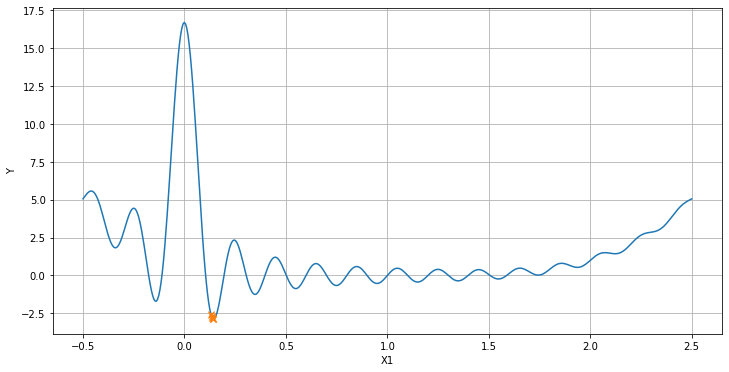

9
0.1404540404692414
-2.855142838032605
-11.248379194187407


In [ ]:
### CODE HERE
def gradient_descent(x,g, alpha, k_max, tol):
  
  history = []
  history.append(x)
  k = 0
  xk1 = 100
  y = []

  minimum = min(func(plot_x))
  while k < k_max and np.linalg.norm(g(xk1))>= tol and func(xk1) > minimum + 0.02  :
    xk = history[-1]
    xk1 = xk - alpha * g(xk)
    history.append(xk1)
    k +=1


  return np.array(history)

x0 = 0.13
alpha = 0.00002
k_max = 100
plot_x = np.linspace(-0.5,2.5,500)
plt.figure(figsize = (12,6))
plt.plot(plot_x,func(plot_x))

x_hist = gradient_descent(x0, dydx,alpha,k_max,1E-1)
plt.scatter(x0,func(x0), label = "initial guess", s = 1)
plt.plot(x_hist,func(x_hist), label = "optimization history", marker = "x")
plt.grid()
plt.xlabel("X1")
plt.ylabel("Y")
plt.show()

print(len(x_hist))
print(x_hist[-1])
print(func(x_hist[-1]))
print(dydx(x_hist[-1]))




Now, using the code below, explore the robustness of gradient descent on this function by doing multiple random initializations of $x_0\in[-0.5, 2.5]$. You can try various learning rates, convergence criteria, etc. and see if you can overcome some of the local minima. It is really challenging to get to the global minimum when using random initial guesses, so don't worry if your algorithm is having a hard time.

In [ ]:
import numpy as np

# set the random seed for repeatable randomness
np.random.seed(2)

### MAKE STORAGE VECTORS HERE FOR SOLUTIONS VALUES, 

history_of_x = []
history_of_yx = []
num_of_itt = []
initial_x = []

### NUMBER OF ITERATIONS TO CONVERGENCE, STORING ALL HISTORIES, ETC.


alpha = 0.0002
k_max = 500

n_inits = 50 # edit as necessary while debugging

for _ in range(n_inits):

  # generate random number between -0.5 and 2.5
  x0 = 3*np.random.random() - 0.5   
  
  ### APPEND OR UPDATE STORAGE VECTORS/ARRAYS AS NECESSARY  

  ### DO ENTIRE GRADIENT DESCENT STARTING FROM X0

  x_hist = gradient_descent(x0,dydx,alpha,k_max,1E-2)

  ### APPEND OR UPDATE STORAGE VECTORS/ARRAYS AS NECESSARY 

  initial_x.append(x0)
  history_of_x.append(x_hist)
  history_of_yx.append(func(x_hist))
  num_of_itt.append(len(x_hist))

Using data from the random initializations, make similar exploratory plots like in problem 1.

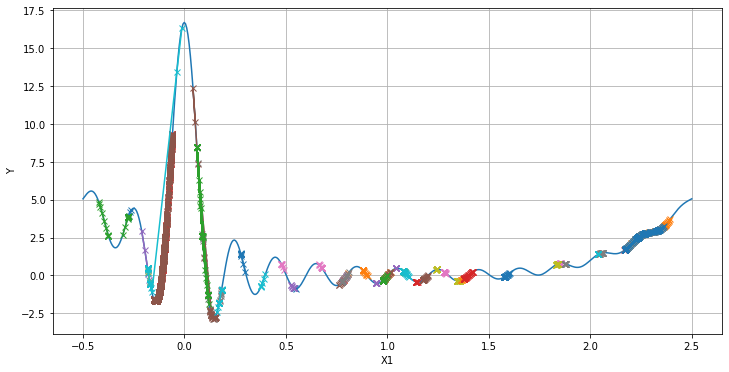

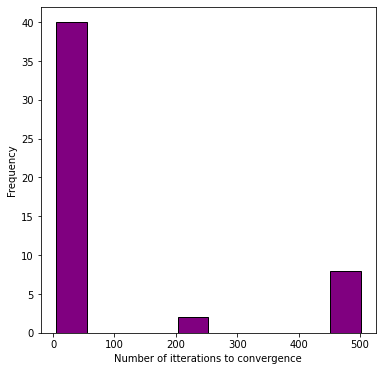

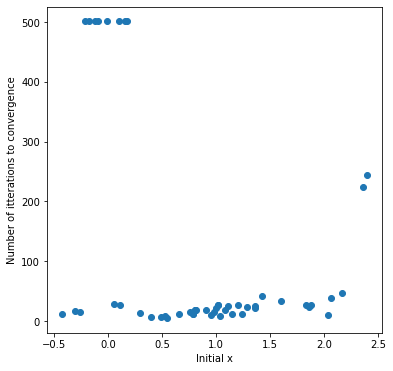

In [ ]:
### CODE HERE'
from matplotlib import pyplot as plt

# plotting trajectories for every single run on a single graph

plot_x = np.linspace(-0.5,2.5,500)
plt.figure(figsize = (12,6))
plt.plot(plot_x,func(plot_x))

plt.scatter(initial_x,func(np.array(initial_x)), label = "initial guesses", s = 1)
for i in range(len(history_of_x)):
  plt.plot(history_of_x[i],history_of_yx[i], marker = "x")
plt.grid()
plt.xlabel("X1")
plt.ylabel("Y")
plt.show()


#plotting a histogram of the number of iterations to convergence

plt.figure(figsize = (6,6))
plt.hist(num_of_itt, color = "purple", edgecolor = "black")
plt.xlabel("Number of itterations to convergence")
plt.ylabel("Frequency")
plt.show()

#plotting a scatter plot for the number of iterations taken to coverge with respect to initial position 

plt.figure(figsize = (6,6))
plt.scatter(initial_x,num_of_itt)
plt.xlabel("Initial x")
plt.ylabel("Number of itterations to convergence")
plt.show()


# 3) Gradient descent with momentum (not required)

For an extra challenge, try implementing gradient descent with momentum. Like we did with $x$, we'll now keep track of a momentum value $v$ at each iteration. We'll introduce a new hyperparameter called momentum decay $\beta \in [0, 1)$. Typical values for $\beta$ logarithmically approach 1, so some typical values might be $0.7, 0.9, 0.99, 0.999$ or so, but any number between $0$ and $1$ is valid.

The update rules for gradient descent with momentum are:

$$ v := \beta v - \alpha \frac{df}{dx}(x) $$
$$ x := x + v $$

(*you should convince yourself that if $\beta = 0$ we are back to doing simple gradient descent!*)

We always initialize the momentum to $0$ at the start. Then, make sure you do the updates in the order shown above. First update $v$, then use the new value of $v$ in your update equation for $x$. Like $\alpha$, you should tune your new $\beta$ hyperparameter as well to improve the performance of your gradient descent algorithm.

Using code and plots, explore this algorithm and its performance on any of the functions in the problem set, the in-class notebook, or any function you are interested in.

In [ ]:
### CODE HERE